In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [32]:
x=pd.read_csv("X.csv")
y=pd.read_csv("Y.csv")

In [33]:
rifX=x
rifY=y["RIF"]

In [34]:
rifX.shape

(3393, 222)

Concatenating features with labels

In [35]:
rifConcatenated=pd.concat([rifX,rifY],axis=1)

In [36]:
rifConcatenated.shape

(3393, 223)

Checking duplicate rows

In [38]:
rifConcatenated.duplicated().value_counts()

False    2779
True      614
dtype: int64

Dropping Duplicate rows

In [39]:
rifConcatenated=rifConcatenated.drop_duplicates()
rifConcatenated.shape

(2779, 223)

Count of invalid labeled rows (label with -1 are invalid rows)

In [40]:
(rifConcatenated["RIF"]==-1).value_counts()

False    2725
True       54
Name: RIF, dtype: int64

Rows with invalid labels

In [41]:
invalidRows=rifConcatenated[rifConcatenated["RIF"]==-1]

In [42]:
invalidRows.index

Int64Index([ 313,  320,  346,  360,  381,  395,  397,  398,  403,  808, 1373,
            1586, 1588, 1706, 1715, 1717, 1800, 1857, 1902, 1945, 2190, 2355,
            2383, 2429, 2630, 2899, 2932, 2935, 3078, 3099, 3100, 3103, 3106,
            3109, 3112, 3118, 3125, 3128, 3131, 3135, 3139, 3155, 3189, 3214,
            3221, 3229, 3235, 3240, 3241, 3242, 3246, 3258, 3259, 3261],
           dtype='int64')

Dropping invalid labeled rows 

In [43]:
rifFiltered=rifConcatenated.drop(invalidRows.index)
rifFiltered.shape

(2725, 223)

Splitting the data into X and Y

In [44]:
rifX=rifFiltered.iloc[:,0:222]
rifY=rifFiltered.iloc[:,[222]]

In [56]:
rifY=(rifY.values).reshape(-1,)

In [58]:
rifY.shape

(2725,)

finding imbalance

1    1456
0    1269
Name: RIF, dtype: int64


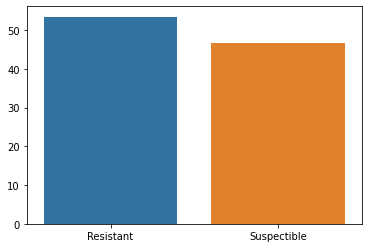

In [59]:
counts=rifFiltered['RIF'].value_counts()
print(counts)
proportions = counts / counts.sum()
proportions=proportions*100
sns.barplot(x=["Resistant","Suspectible"],y=proportions.values)
plt.show()

In [60]:
rifX_train,rifX_test,rifY_train,rifY_test=train_test_split(rifX,rifY,test_size=0.2,random_state=21)

parameter tuning for random forest

In [61]:
model1=RandomForestClassifier()
param_grid = {
    'n_estimators': [30,50, 100],
    'max_depth': [None, 5, 10],
}
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 50}


parameter tuning for svm

In [62]:
model2=svm.SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model2, param_grid, refit=True, verbose=0, cv=5,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


parameter tuning for logistic regression

In [51]:
# model3=LogisticRegression()
# param_grid = {'C': [ 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# grid_search = GridSearchCV(model3, param_grid=param_grid,cv=5,verbose=0)
# grid_search.fit(rifX, rifY)
# print(grid_search.best_params_)

# parameter tuning for BernoulliNB

In [63]:
model4=BernoulliNB()
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(model4, param_grid=param_grid, cv=5,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 10}


# model1 (random forest)

Random forest
--------------------
accuracy  0.8972477064220183
f1_score  0.9041095890410958
auc  0.9005195974142868
precision  0.9395017793594306
sensitivity  0.8712871287128713
specificity  0.12871287128712872


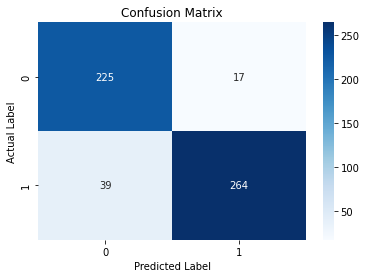

In [64]:
rifModel1=RandomForestClassifier(n_estimators=50,max_depth=5)
rifModel1.fit(rifX_train,rifY_train)
rifPred=rifModel1.predict(rifX_test)
print("Random forest")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model 2 (svm)

SVM
--------------------
accuracy  0.9577981651376147
f1_score  0.962233169129721
auc  0.956638845702752
precision  0.9575163398692811
sensitivity  0.966996699669967
specificity  0.03300330033003296


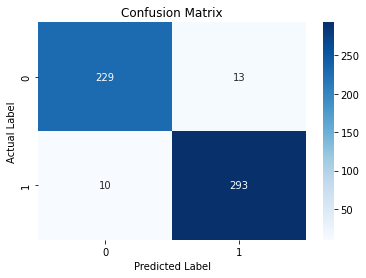

In [65]:
rifModel2=svm.SVC(kernel="linear",C= 0.1, gamma= 0.1)
rifModel2.fit(rifX_train,rifY_train)
rifPred=rifModel2.predict(rifX_test)
print("SVM")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model 3 (Logistic regression)

Logistic Regression
--------------------
accuracy  0.9596330275229358
f1_score  0.9638157894736842
auc  0.9587049614052314
precision  0.9606557377049181
sensitivity  0.966996699669967
specificity  0.03300330033003296


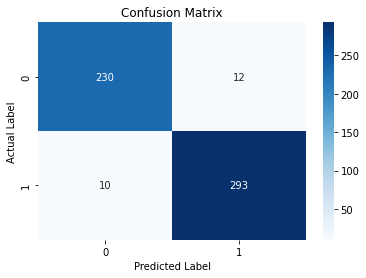

In [66]:
rifModel3=LogisticRegression()
rifModel3.fit(rifX_train,rifY_train)
rifPred=rifModel3.predict(rifX_test)
print("Logistic Regression")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model4 (bernoulliNB)


BernoulliNB
--------------------
accuracy  0.8935779816513761
f1_score  0.9010238907849829
auc  0.8963873660093281
precision  0.9328621908127208
sensitivity  0.8712871287128713
specificity  0.12871287128712872


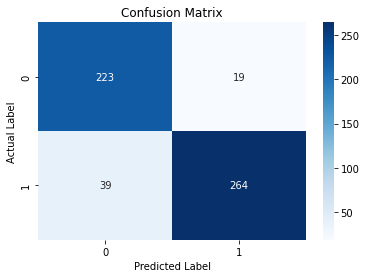

In [67]:
rifModel4=BernoulliNB(alpha=10)
rifModel4.fit(rifX_train,rifY_train)
rifPred=rifModel4.predict(rifX_test)
print("BernoulliNB")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# evaluating using cross_validation_score with folds=30

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
print("Random Forest")
aucScores=cross_val_score(rifModel1, rifX, rifY, cv=30, scoring="roc_auc")
f1Scores = cross_val_score(rifModel1, rifX, rifY, cv=30, scoring='f1')
print("Mean f1_score ",f1Scores.mean())
print("Mean auc ",aucScores.mean())

Random Forest
Mean f1_score  0.838124131444717
Mean auc  0.9890611541774331


In [70]:
print("SVM")
aucScores=cross_val_score(rifModel2, rifX, rifY, cv=30, scoring="roc_auc")
f1Scores = cross_val_score(rifModel2, rifX, rifY, cv=30, scoring='f1')
print("Mean f1_score ",f1Scores.mean())
print("Mean auc ",aucScores.mean())

SVM
Mean f1_score  0.950599159141003
Mean auc  0.9907547325870179


In [74]:
print("Logistic Regression")
aucScores=cross_val_score(rifModel3, rifX, rifY, cv=20, scoring="roc_auc")
f1Scores = cross_val_score(rifModel3, rifX, rifY, cv=20, scoring='f1')
print("Mean f1_score ",f1Scores.mean())
print("Mean auc ",aucScores.mean())
# print(aucScores)

Logistic Regression
Mean f1_score  0.9366939164996181
Mean auc  0.9902883099586866


In [72]:
print("BernoulliNB")
aucScores=cross_val_score(rifModel4, rifX, rifY, cv=30, scoring="roc_auc")
f1Scores = cross_val_score(rifModel4, rifX, rifY, cv=30, scoring='f1')
print("Mean f1_score ",f1Scores.mean())
print("Mean auc ",aucScores.mean())
# print(aucScores)

BernoulliNB
Mean f1_score  0.8369039315330876
Mean auc  0.9596326288913498
